In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import unicodedata
import re
from ast import literal_eval
import string
import numpy as np

In [27]:
def cleanup(content):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', content)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [2]:
df = pd.read_csv(r'E:\luna-nlp-paper\tools\luna_tweets_sentiment_all.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df_grpd = df.groupby(by=pd.Grouper(key='date', freq='4H')).mean()

In [22]:
plt.rcParams["figure.figsize"] = (8,6)

<AxesSubplot:xlabel='bert', ylabel='Count'>

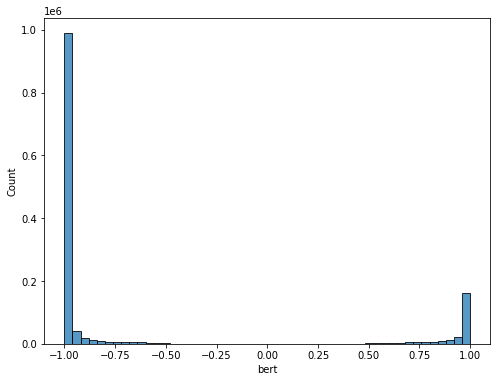

In [23]:
sns.histplot(df.bert, bins=50)

<AxesSubplot:xlabel='vader', ylabel='Count'>

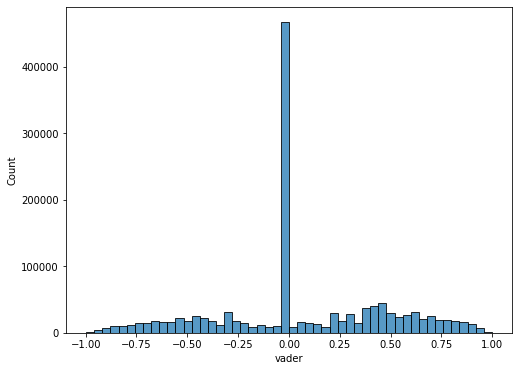

In [24]:
sns.histplot(df.vader, bins=50)

In [28]:
words = cleanup(''.join(str(df['content'].tolist())))

In [29]:
bigram = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:50]
trigram = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:50]

<AxesSubplot:>

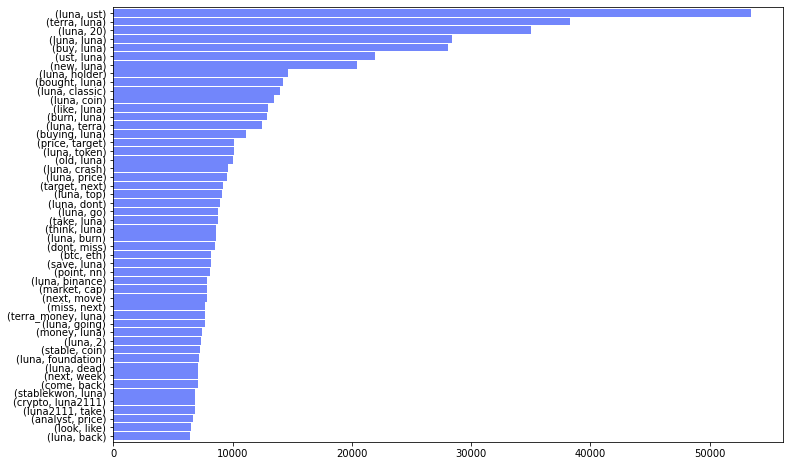

In [30]:
bigram.sort_values().plot.barh(color='#7286FB', width=.9, figsize=(12, 8))

<AxesSubplot:>

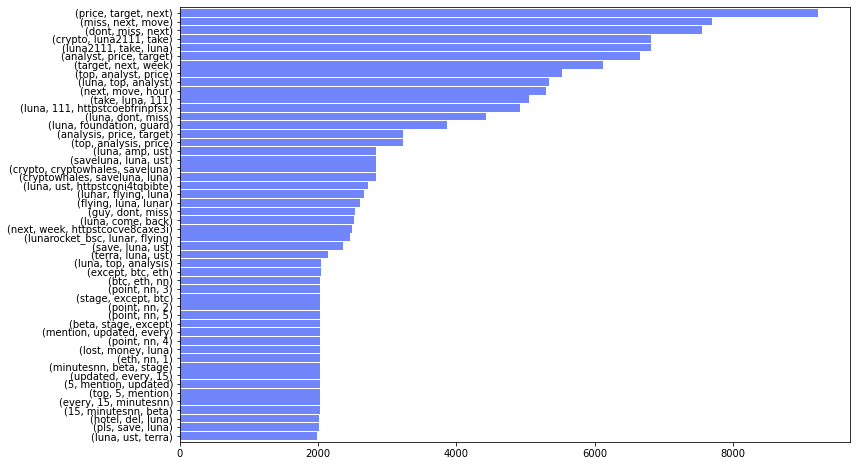

In [31]:
trigram.sort_values().plot.barh(color='#7286FB', width=.9, figsize=(12, 8))

In [37]:
lemmatizer = nltk.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
def cleanup_data(tweet_content):
    """Lemmatize, remove links and punctuaction"""
    return [lemmatizer.lemmatize(word) for word in
            [word for word in
             re.split('\W+', re.sub('[0-9]+', '',
                                    ''.join([char for char in re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', tweet_content)
                                             if char not in string.punctuation]))) if word not in stopwords]]
df['processed_content'] = df['content'].apply(lambda x: cleanup_data(x))

In [39]:
#df['processed_content'] = df.processed_content.apply(lambda x: literal_eval(x))
df['processed_str'] = df['processed_content'].apply(lambda x: ' '.join([str(word).lower() for word in x]))

In [89]:
ngrams_list = [['hotel', 'del', 'luna']]
sus_list = [['price', 'target', 'next'], ['miss', 'next', 'move'], ['dont', 'miss', 'next'], ['cryptowhales', 'saveluna', 'luna'], ['lunar', 'flying', 'luna'], ['except', 'btc', 'eth', 'beta'], ['mention', 'updated', 'every'], ['hotel', 'del', 'luna']]

In [90]:
def check_for_ngrams(sentence, ngram):
    return 1 if all(sentence.split().__contains__(wrd) for wrd in ngram) else 0
df['ngram_count'] = df['processed_str'].apply(lambda sentence: np.sum([check_for_ngrams(sentence, ngram) for ngram in ngrams_list]))

In [91]:
for i in range(100):
    print(df[df.ngram_count>0]['content'].iloc[i] + '\n' + '-'*100)

I've just watched episode S01 | E10 of Hotel Del Luna! https://t.co/YTOuBcaEhn #tvtime https://t.co/sXGkrc6XVA
----------------------------------------------------------------------------------------------------
@abduxuelis Hotel del Luna, Tomorrow, 25 21, las inclemencias del amor, Lawness Lawyer, It's okey not to be okey, El amor es como el cha cha cha
----------------------------------------------------------------------------------------------------
just finished hotel del luna &amp; now my heart hurts so much😭😭😭😭😭
----------------------------------------------------------------------------------------------------
So I'm watching vagabond and also simultaneously started hotel del Luna and coincidentally both the shows have the actors from mouse. The main lead from mouse plays the main lead in vagabond and the child actor who played the main lead in mouse also plays the same in hdl
----------------------------------------------------------------------------------------------------
i